# Predicting the Used Cars using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of set used cars.

1. Problem definition
How well can we predict the price of a used cars, given its characteristics and categories provided by Kaggle.

2. Data
The data was adapted from that of Used Cars Dataset , which was constructed by scraping data on car sales from Craigslist.org every few months. https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

There is 1 datasets:

* vehicles.csv

3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted prices.

For more on the evaluation of this project check: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

4. Features 

* id - a unique identifier for each row
* url - listing URL
* region - craigslist region
* region_url - region URL
* price - entry price
* year - year of vehicle
* manufacturer - manufacturer of vehicle
* model - model of vehicle
* condition - condition of vehicle
* cylinders - number of cylinders
* fuel - fuel type
* odometer - miles traveled by vehicle
* title_status - title status of vehicle
* transmission - transmission of vehicle
* VIN - vehicle identification number
* drive - type of drive
* size - size of vehicle
* type - generic type of vehicle
* paint_color - color of vehicle
* image_url - image URL
* description - listed description of vehicle
* state - state of listing
* lat - latitude of listing
* long - longitude of listing
* posting_date - date of posting the listing

# Importing the data and preparing it for modeling

In [1]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Import the training and validation set
df = pd.read_csv("vehicles.csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [35]:
df.head().T

,0,1,2,3,4
id,7222695916,7218891961,7221797935,7222270760,7210384030
url,https://prescott.craigslist.org/cto/d/prescott...,https://fayar.craigslist.org/ctd/d/bentonville...,https://keys.craigslist.org/cto/d/summerland-k...,https://worcester.craigslist.org/cto/d/west-br...,https://greensboro.craigslist.org/cto/d/trinit...
region,prescott,fayetteville,florida keys,worcester / central MA,greensboro
region_url,https://prescott.craigslist.org,https://fayar.craigslist.org,https://keys.craigslist.org,https://worcester.craigslist.org,https://greensboro.craigslist.org
price,6000,11900,21000,1500,4900
year,NaN,NaN,NaN,NaN,NaN
manufacturer,NaN,NaN,NaN,NaN,NaN
model,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN
cylinders,NaN,NaN,NaN,NaN,NaN


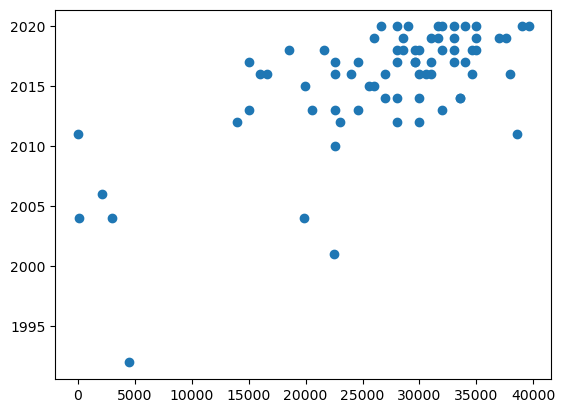

In [31]:
fig, ax = plt.subplots()
ax.scatter(df["price"][:100], df["year"][:100])

<Axes: ylabel='Frequency'>

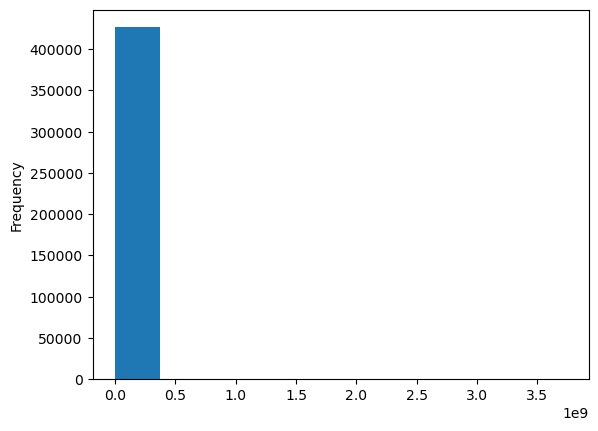

In [32]:
df.price.plot.hist()

In [34]:
df.corr(numeric_only=True)

,id,price,year,odometer,county,lat,long
id,1.000000,-0.002779,-0.059040,0.010721,NaN,-0.069388,-0.121864
price,-0.002779,1.000000,-0.004925,0.010032,NaN,0.000357,-0.000408
year,-0.059040,-0.004925,1.000000,-0.157215,NaN,-0.014677,-0.001410
odometer,0.010721,0.010032,-0.157215,1.000000,NaN,-0.001459,0.009807
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,-0.069388,0.000357,-0.014677,-0.001459,NaN,1.000000,-0.128088
long,-0.121864,-0.000408,-0.001410,0.009807,NaN,-0.128088,1.000000


In [38]:
df.price.head(30)

0      6000
1     11900
2     21000
3      1500
4      4900
5      1600
6      1000
7     15995
8      5000
9      3000
10        0
11        0
12        0
13        0
14        0
15    13995
16    24999
17    21850
18    26850
19    11999
20    24999
21    21850
22    26850
23    11999
24    24999
25    21850
26      500
27    33590
28    22590
29    39590
Name: price, dtype: int64

## Make a copy of the original DataFrame
Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [39]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [40]:
# Check the different values of different columns
df_tmp.manufacturer.value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


## 5. Modelling

We know the evaluation metric we're heading towards. We could spend more time doing exploratory data analysis (EDA), finding more out about the data ourselves but what we'll do instead is use a machine learning model to help us do EDA.

Following the https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html learning map, we find a https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor might be a good candidate.

In [44]:
# Check for missing categories and different datatypes
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [43]:
# Check for missing values
df_tmp.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

## Convert strings to categories
One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this we can use the pandas types API which allows us to interact and manipulate the types of data.

In [47]:
df_tmp.tail().T

,426875,426876,426877,426878,426879
id,7301591192,7301591187,7301591147,7301591140,7301591129
url,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org/ctd/d/atlanta-2...
region,wyoming,wyoming,wyoming,wyoming,wyoming
region_url,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org
price,23590,30590,34990,28990,30590
year,2019.0,2020.0,2020.0,2018.0,2019.0
manufacturer,nissan,volvo,cadillac,lexus,bmw
model,maxima s sedan 4d,s60 t5 momentum sedan 4d,xt4 sport suv 4d,es 350 sedan 4d,4 series 430i gran coupe
condition,good,good,good,good,good
cylinders,6 cylinders,NaN,NaN,6 cylinders,NaN


In [48]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

url
region
region_url
manufacturer
model
condition
cylinders
fuel
title_status
transmission
VIN
drive
size
type
paint_color
image_url
description
state
posting_date


In [49]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [50]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            426880 non-null  int64   
 1   url           426880 non-null  category
 2   region        426880 non-null  category
 3   region_url    426880 non-null  category
 4   price         426880 non-null  int64   
 5   year          425675 non-null  float64 
 6   manufacturer  409234 non-null  category
 7   model         421603 non-null  category
 8   condition     252776 non-null  category
 9   cylinders     249202 non-null  category
 10  fuel          423867 non-null  category
 11  odometer      422480 non-null  float64 
 12  title_status  418638 non-null  category
 13  transmission  424324 non-null  category
 14  VIN           265838 non-null  category
 15  drive         296313 non-null  category
 16  size          120519 non-null  category
 17  type          334022 non-null

In [51]:
df_tmp.region.cat.categories

Index(['SF bay area', 'abilene', 'akron / canton', 'albany', 'albuquerque',
       'altoona-johnstown', 'amarillo', 'ames', 'anchorage / mat-su',
       'ann arbor',
       ...
       'winchester', 'winston-salem', 'worcester / central MA', 'wyoming',
       'yakima', 'york', 'youngstown', 'yuba-sutter', 'yuma',
       'zanesville / cambridge'],
      dtype='object', length=404)

In [52]:
df_tmp.fuel.cat.categories

Index(['diesel', 'electric', 'gas', 'hybrid', 'other'], dtype='object')

In [53]:
df_tmp.image_url.cat.categories

Index(['https://images.craigslist.org/00000_10YT2O7H5DCz_0jm0ew_600x450.jpg',
       'https://images.craigslist.org/00000_112dpM9ozl2z_0xS0po_600x450.jpg',
       'https://images.craigslist.org/00000_11C3DwEAnVgz_0ak07K_600x450.jpg',
       'https://images.craigslist.org/00000_11xUtxsPboXz_0g80c6_600x450.jpg',
       'https://images.craigslist.org/00000_12UJBRistKIz_09Q06Y_600x450.jpg',
       'https://images.craigslist.org/00000_12hkuDwzKP6z_0kE0f9_600x450.jpg',
       'https://images.craigslist.org/00000_13GFquFExrcz_0ak07K_600x450.jpg',
       'https://images.craigslist.org/00000_14gTXIvBWyrz_0cU09G_600x450.jpg',
       'https://images.craigslist.org/00000_16geE5WLVouz_0ak07K_600x450.jpg',
       'https://images.craigslist.org/00000_16kNsHHJSg8z_0ak07K_600x450.jpg',
       ...
       'https://images.craigslist.org/01717_vAsbu87Vn3z_0t20CI_600x450.jpg',
       'https://images.craigslist.org/01717_vzcEattOZEz_0CI0t2_600x450.jpg',
       'https://images.craigslist.org/01717_wIbZAZi8mGz

In [54]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            426880 non-null  int64   
 1   url           426880 non-null  category
 2   region        426880 non-null  category
 3   region_url    426880 non-null  category
 4   price         426880 non-null  int64   
 5   year          425675 non-null  float64 
 6   manufacturer  409234 non-null  category
 7   model         421603 non-null  category
 8   condition     252776 non-null  category
 9   cylinders     249202 non-null  category
 10  fuel          423867 non-null  category
 11  odometer      422480 non-null  float64 
 12  title_status  418638 non-null  category
 13  transmission  424324 non-null  category
 14  VIN           265838 non-null  category
 15  drive         296313 non-null  category
 16  size          120519 non-null  category
 17  type          334022 non-null

In [55]:
df_tmp.state.cat.categories

Index(['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi',
       'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn',
       'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh',
       'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa',
       'wi', 'wv', 'wy'],
      dtype='object')

In [56]:
df_tmp.state.cat.codes

0          3
1          2
2          9
3         19
4         27
          ..
426875    50
426876    50
426877    50
426878    50
426879    50
Length: 426880, dtype: int8

In [57]:
df_tmp.isnull().sum()/len(df_tmp)

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
image_url       0.000159
description     0.000164
county          1.000000
state           0.000000
lat             0.015342
long            0.015342
posting_date    0.000159
dtype: float64